# Predicting breast cancer using PCA and Multiple classification models.

# Attribute Information:
1) ID number                                   
2) Diagnosis (M = malignant, B = benign)       

All attributes are real values. Some of the attributes are as follows:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

Perform modeling using six algorithms (click to read its documentation in sklearn):

           i) Decision Trees,
           ii) Random Forest,
           iii) ExtraTreesClassifier,
           iv) Gradient Boosting Machine
           v) XGBoost, and
           vi) KNeighborsClassifier 
In this assignment, we will be doing the following activities.

        i)  Read dataset. Check if any column has any missing variable.
        ii) Drop any column not needed (ID column, for example)
        iii)Segregate dataset into predictors (X) and target (y)
        iv) Map values in ' y ' (target) from 'M' and 'B' to 1 and 0
        v)  Scale all numerical features in X  using sklearn's StandardScaler class
        vi) Perform PCA on numeric features, X. Only retain as many PCs, to explain 95% of the variance   
        vii)Use PCs from (vi) as your explanatory variables. This is our new X.
        viii)Split X,y into train and test datasets in the ratio of 80:20.
        ix) Perform modeling on (X_train,y_train) using above listed algorithms (six).
        x) Make predictions on test (X_test) for each one of the models. Compare the output of predictions 
        in each case with actual (y_test)
        xi) Compare the performance of each of these models by calculating metrics::
             a) accuracy,
             b) Precision & Recall,
             c) F1 score,
             d) AUC
        xii) Also draw ROC curve for each

### Import the required libraries and classifiers from the sklearn. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import make_hastie_10_2
import os

#### Import StandardScaler function to scale the numerical features.

In [2]:
from sklearn.preprocessing import StandardScaler as ss

#### Import the metrics from sklearn

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

#### Import PCA from skelarn

In [4]:
from sklearn.decomposition import PCA

#### Get the file and read it

In [5]:
os.chdir("../input")
os.listdir()

['data.csv']

In [6]:
data = pd.read_csv("../input/data.csv")

#### Simple Exploration of data

In [7]:
data.shape

(569, 33)

In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
data.shape

(569, 33)

##### Droping the column id and Unnamed: 32 (null column) as these won't play any role while predicting the breast camcer.

In [12]:
df=data.drop(['id','Unnamed: 32'],axis=1)

In [13]:
df.shape

(569, 31)

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Separate the predictors and target. Here our aim to predict whether a breast cancer cell is benign or malignant. So the column 'diagnosis' is the target and rest other 30 columns are act as predictors(features).

In [15]:
X = df.loc[: , 'radius_mean':'fractal_dimension_worst']
y = df.loc[:, 'diagnosis']

#### Map the values in target column with 1 and 0, here we are mapping M as 1 and B as 0. 

In [16]:
df['diagnosis'].replace('M',1,inplace=True)
df['diagnosis'].replace('B',0,inplace=True)

#### Scale all numerical features in X  using sklearn's StandardScaler class

In [17]:
scale = ss()
X = scale.fit_transform(X)

#### Performing PCA on numeric columns. 
###### PCA is helpfull to reduce the dimentionality of the feature columns. As of now we have 30 features in the data, so we need to reduce the number of feature columns, at the same time we need to take care about the variance in data also. In this case we are considering the variance as .95. PCA transforms the the existing set of features into new set of features(reduced in number) and these are called Principal Componants. 


In [18]:
pca = PCA()
out = pca.fit_transform(X)
out.shape 

(569, 30)

#### Calculate the variance of each columns in the predictors.

In [19]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

#### Calculate the cumulative sum of each column, by this we can decide that how many PCs (Principal components) we need to consider to get desired variance. As I told before in this case we are considering the .95 variance, so we can take first 10 columns as PCs.

In [20]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

#### Assign the first 10 columns of the 'out' to final_data. 'out' has the fit and transformed values after we performed the PCA of feature columns.

In [21]:
final_data = out[:, :10]

In [22]:
final_data.shape

(569, 10)

In [23]:
final_data[:5,:]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
         1.41142445,  2.15936987, -0.39840723, -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
         0.02865635,  0.01335809,  0.24098846, -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208267, -0.1770859 ,
         0.54145215, -0.66816648,  0.09737374,  0.02406564,  0.4542754 ],
       [ 7.1229532 , 10.27558912, -3.23278955,  0.15254703, -2.9608784 ,
         3.05342182,  1.4299107 ,  1.05956524, -1.40543967, -1.11697527],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063935,  0.5467474 ,
        -1.22649464, -0.93621255,  0.63637606, -0.26380546,  0.37770447]])

##### We need to create the new Dataframe with 10 PCs as predictors and with target column. This will be our new data file. As showed below we are creating the dataframe with values in the final_data and with column names as PC1 through PC10. And 'target' as target column.

In [24]:
pcdf = pd.DataFrame( data =  final_data,
                    columns = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [25]:
pcdf['target'] = data['diagnosis'].map({'M': 1, "B" : 0 })

In [26]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,1


#### As this is our new file, we need to separate the X(Predictors) and y(target) . These 10 PCs will be our new predictors.

In [27]:
X = pcdf.loc[: , 'pc1':'pc10']
y = pcdf.loc[:,'target']

In [28]:
X.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### Once we get the final predictors and target, we need to split the data into train and test data. For this we can use sklearn's train_test_split function. Here I am using test_size = 0.2, that means I am using 20% of the data as test data and other 80% data for training the model. shuffle=True make sure the data are shuffled before the split, so that random data will go into train and test splits.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2,shuffle=True)

In [31]:
X_train.shape

(455, 10)

In [32]:
X_test.shape

(114, 10)

In [33]:
y_train.shape

(455,)

In [34]:
y_test.shape

(114,)

#### As I told in the begining, here we are using multiple classifier models for prediction. We are creating the default classifier. 

In [35]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
xg = XGBClassifier(learning_rate=0.5,
                   reg_alpha= 5,
                   reg_lambda= 0.1
                   )
gbm = GradientBoostingClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()

#### Train the data using data in the X_train and y_train.

In [36]:
dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)
et1 = et.fit(X_train,y_train)
knn1 = knn.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Once the training the model is done, Make the prediction on the test data. 

In [37]:
y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_xg= xg1.predict(X_test)
y_pred_gbm= gbm1.predict(X_test)
y_pred_et= et1.predict(X_test)
y_pred_knn= knn1.predict(X_test)
y_pred_dt

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0])

#### Calculate the prediction probability of the models.

In [38]:
y_pred_dt_prob = dt1.predict_proba(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)
y_pred_gbm_prob= gbm1.predict_proba(X_test)
y_pred_et_prob= et1.predict_proba(X_test)
y_pred_knn_prob= knn1.predict_proba(X_test)

#### Calculate the accuracy score using the sklearn's accuracy_score function. accuracy score is calcuated by y_test,y_pred_dt. y_test is having actual values and y_pred_dt is having predicted values. This is nothingbut how accurate the model is predicting.

In [39]:
print (accuracy_score(y_test,y_pred_dt))
print (accuracy_score(y_test,y_pred_rf))
print (accuracy_score(y_test,y_pred_xg))
print (accuracy_score(y_test,y_pred_gbm))
print (accuracy_score(y_test,y_pred_et))
print (accuracy_score(y_test,y_pred_knn))

0.9122807017543859
0.9298245614035088
0.9385964912280702
0.9473684210526315
0.9385964912280702
1.0


#### Prepare the confusion matrix. This uses the y_test and y_pred_dt. y_test is having actual values and y_pred_dt is having predicted values. Once confusion matrix prepared, we will come to know TP,TN,FP,FN values.

In [40]:
confusion_matrix(y_test,y_pred_dt)
confusion_matrix(y_test,y_pred_rf)
confusion_matrix(y_test,y_pred_xg)
confusion_matrix(y_test,y_pred_gbm)
confusion_matrix(y_test,y_pred_et)
confusion_matrix(y_test,y_pred_knn)
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_dt).flatten()

#### ROC Graph

In [41]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,
                                 y_pred_dt_prob[: , 1],
                                 pos_label= 1
                                 )

In [42]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

In [43]:
fpr_xg, tpr_xg, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob[: , 1],
                                 pos_label= 1
                                 )

In [44]:
fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test,
                                 y_pred_gbm_prob[: , 1],
                                 pos_label= 1
                                 )

In [45]:
fpr_et, tpr_et,thresholds = roc_curve(y_test,
                                 y_pred_et_prob[: , 1],
                                 pos_label= 1
                                 )

In [46]:
fpr_knn, tpr_knn,thresholds = roc_curve(y_test,
                                 y_pred_knn_prob[: , 1],
                                 pos_label= 1
                                 )

#### Calculate the Precision, Recall and F1 Score

In [47]:
p_dt,r_dt,f_dt,_ = precision_recall_fscore_support(y_test,y_pred_dt)
p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf)
p_gbm,r_gbm,f_gbm,_ = precision_recall_fscore_support(y_test,y_pred_gbm)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg)
p_et,r_et,f_et,_ = precision_recall_fscore_support(y_test,y_pred_et)
p_knn,r_knn,f_knn,_ = precision_recall_fscore_support(y_test,y_pred_knn)
p_dt,r_dt,f_dt

(array([0.94871795, 0.83333333]),
 array([0.925     , 0.88235294]),
 array([0.93670886, 0.85714286]))

#### Calculate the AUC(Area Under the ROC Curve). More the AUC, more the better model.

In [48]:
print (auc(fpr_dt,tpr_dt))
print (auc(fpr_rf,tpr_rf))
print (auc(fpr_gbm,tpr_gbm))
print (auc(fpr_xg,tpr_xg))
print (auc(fpr_et,tpr_et))
print (auc(fpr_knn,tpr_knn))

0.9036764705882353
0.9950367647058823
0.9966911764705882
0.9941176470588236
0.9915441176470587
1.0


#### Below is the plotting of ROC curve for all the models, we can see that KNN is having more AUC and we can say that KNN is better in this case.

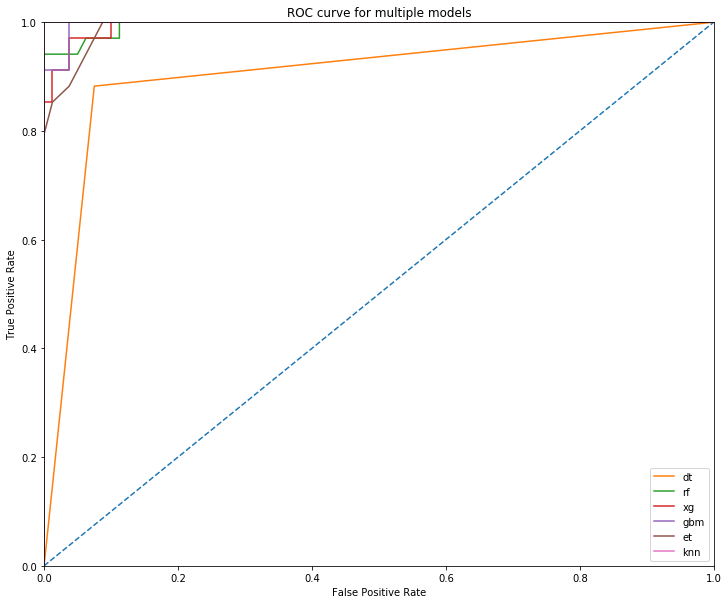

In [49]:
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for multiple models')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_xg, tpr_xg, label = "xg")
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")
ax.plot(fpr_et, tpr_et, label = "et")
ax.plot(fpr_knn, tpr_knn, label = "knn")
# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()